# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [1]:
#libraries
import pandas as pd
import scipy.stats as st
import numpy as np

import matplotlib

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [21]:
condition1 = df["Type 2"] == "Dragon"
condition2 = df["Type 2"] == "Grass"

df[condition1 | condition2].groupby("Type 2")["HP"].mean()

Type 2
Dragon    82.166667
Grass     62.640000
Name: HP, dtype: float64

- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

In [49]:
#code here

df_dragon = df[df["Type 2"]=="Dragon"]["HP"]
df_grass = df[df["Type 2"]=="Grass"]["HP"]

In [47]:
df_dragon

7       78
196     90
249     75
275     70
360     50
361     80
540    100
541     90
544    150
545    150
694     52
695     72
696     92
761     65
766     58
767     82
790     40
791     85
Name: HP, dtype: int64

In [ ]:
#Set the hypothesis

#H0: mu_hp dragon <= mu_hp grass
#H1: mu_hp dragon > mu_hp grass

#significance level = 0.05

In [28]:
result = st.ttest_ind(df_dragon,df_grass, equal_var=False)

In [30]:
p_value_one_tailed = result.pvalue / 2 if df_dragon.mean() > df_grass.mean() else 1 - (result.pvalue / 2)

p_value_one_tailed


0.008901115106813566

In [34]:
if p_value_one_tailed < 0.05:
    print(f"pvalue is {p_value_one_tailed} < 0.05 - we can reject h0, meaning that the average HP for dragon pokemons is higher than grass")
else:
    print(f"pvalue is {p_value_one_tailed} > 0.05 - we failed to rejct h0")

pvalue is 0.008901115106813566 < 0.05 - we can reject h0, meaning that the average HP for dragon pokemons is higher than grass


- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.

In [53]:
df_legendary = df[df["Legendary"] == True]
df_non_legendary = df[df["Legendary"] == False]

In [52]:
df_legendary

156     90
157     90
158     90
162    106
163    106
      ... 
795     50
796     50
797     80
798     80
799     80
Name: HP, Length: 65, dtype: int64

In [41]:
df_non_legendary

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
787,Gourgeist Super Size,Ghost,Grass,85,100,122,58,75,54,6,False
788,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False
790,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False


In [54]:
from scipy.stats import ttest_ind

stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

results = []
for stat in stats:

    legendary = df_legendary[stat]
    non_legendary = df_non_legendary[stat]

    t_stat, p_val = ttest_ind(legendary, non_legendary, equal_var=False)
    
    results.append({"Stat": stat, "p-value": p_val, "Significant": p_val < 0.05})

results_df = pd.DataFrame(results)
print(results_df)

      Stat       p-value  Significant
0       HP  1.002691e-13         True
1   Attack  2.520372e-16         True
2  Defense  4.826998e-11         True
3  Sp. Atk  1.551461e-21         True
4  Sp. Def  2.294933e-15         True
5    Speed  1.049016e-18         True


In [55]:
# because pvalue < 0.05 for all stats, we can reject the null hypothesis for each of them, meaning there is a statistically significant difference in each stat between legendary and non-legendary

**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 34)
- Hospital coordinates (-122, 37)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

In [23]:
def distance_school(row):
    distance = (row["longitude"]-(-118))**2 + (row["latitude"]-34)**2
    return np.sqrt(distance)

def distance_hospital(row):
    distance = (row["longitude"]-(-122))**2 + (row["latitude"]-37)**2
    return np.sqrt(distance)

df["distance_school"] = df.apply(distance_school, axis=1)
df["distance_hospital"] = df.apply(distance_hospital, axis=1)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,distance_school,distance_hospital,close_to_point_of_interest
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3.694888,8.187319,False
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3.552591,7.966235,False
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3.453940,8.143077,False
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3.448840,8.154416,False
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,3.456848,8.183508,False


In [24]:
df["close_to_point_of_interest"] = df.apply(lambda row: min(row["distance_school"], row["distance_hospital"]) < 0.50, axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,distance_school,distance_hospital,close_to_point_of_interest
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,3.694888,8.187319,False
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3.552591,7.966235,False
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3.453940,8.143077,False
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3.448840,8.154416,False
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,3.456848,8.183508,False


In [25]:
df["close_to_point_of_interest"].value_counts()

close_to_point_of_interest
False    10171
True      6829
Name: count, dtype: int64

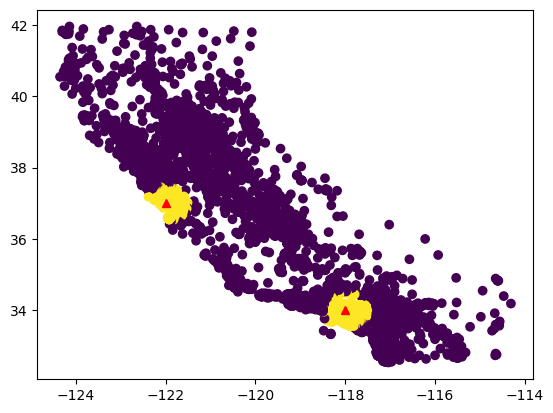

In [27]:
import matplotlib.pyplot as plt

plt.scatter(df["longitude"], df["latitude"], c = df["close_to_point_of_interest"])
plt.plot(-118, 34, "r^")
plt.plot(-122, 37, "r^")
plt.show()

In [30]:
# hypothesis testing

# H0: mu price houses_far >= mu price houses_close
# H1: mu price houses_far < mu price houses_close

# alpha = 0.05

houses_far = df[df['close_to_point_of_interest'] == False]["median_house_value"]
houses_close = df[df['close_to_point_of_interest'] == True]["median_house_value"]

In [31]:
import scipy.stats as st

st.ttest_ind(houses_far, houses_close, alternative = "less", equal_var = False)

TtestResult(statistic=-37.992330214201516, pvalue=1.5032478884296307e-301, df=14571.229910954282)

In [ ]:
# With 